Group 13
Module 3
Francisco Castellano Rodriguez - 020425T136- fracas@chalmers.se
Ivan Frolyak Ostrovskyy - 000706T617 - frolyak@chalmers.se
Program: Exchange Student (Erasmus)
Time spent: 10h each.

We hereby declare that we have both actively participated in solving every exercise. All solutions are entirely our own work, without having taken part in other solutions.

First, we are going to define our classifier with the respective functions of training, predicting and evaluating.
There are a lot of algorithms done to do this, but to get a bit inside and understand it better we are going to define our own classifier with help of some functions from the sklearn library.

Our classifier is a simple implementation of the K-Means clustering algorithm. It uses the KMeans function from the sklearn.cluster module to perform the clustering and assigns labels to the centroids based on the most common label in each cluster. It can also predict the labels for new data points and calculate the accuracy of these predictions.

K-Means is an unsupervised machine learning algorithm used to partition a dataset into K clusters. Each cluster is defined by the mean value of the data points that belong to it, also known as the cluster centroid.

In [1]:
import torch
from sklearn.cluster import KMeans
import numpy as np

class KMeansClassifier:
    def __init__(self, n_clusters, max_iter = 300):
        """
            Initialize the KMeansClassifier with the specified number of clusters and maximum iterations.

            Parameters:
            - n_clusters: int, the number of clusters to create.
            - max_iter: int, maximum number of iterations for KMeans clustering (default is 300).
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroid_labels = None
        self.kmeans = None

    def fit(self, X, y):
        """
            Fits the KMeansClassifier to the input data.

            Parameters:
            - X: torch.Tensor or pandas.DataFrame, input features for clustering.
            - y: array-like, true labels for assigning labels to centroids.
        """
        X_tensor = X if isinstance(X, torch.Tensor) else torch.tensor(X.values, dtype=torch.float32)

        # Use sklearn's KMeans for clustering
        self.kmeans = KMeans(n_clusters = self.n_clusters, max_iter = self.max_iter, random_state = 0)
        clusters = self.kmeans.fit_predict(X_tensor)

        # Assign labels to centroids
        self.centroid_labels = np.zeros(self.n_clusters)
        for i in range(self.n_clusters):
            cluster_indices = (clusters == i)
            if np.any(cluster_indices):
                self.centroid_labels[i] = np.argmax(np.bincount(y[cluster_indices]))


    def predict(self, X):
        """
            Predict labels for input data based on the nearest centroids.

            Parameters:
            - X: torch.Tensor or pandas.DataFrame, input features for prediction.

            Returns:
            - array-like, predicted labels.
        """
        X_tensor = X if isinstance(X, torch.Tensor) else torch.tensor(X.values, dtype = torch.float32)
        
        # Predict the nearest centroid for each sample
        nearest_centroids = self.kmeans.predict(X_tensor)
        return self.centroid_labels[nearest_centroids]

    def score(self, X, y):
        """
            Calculate the accuracy score of predictions compared to true labels.

            Parameters:
            - X: torch.Tensor or pandas.DataFrame, input features for prediction.
            - y: array-like, true labels for comparison.

            Returns:
            - float, accuracy score.
        """
        predictions = self.predict(X)
        return np.mean(predictions == y)

For those who didn't know what a 'nearest centroid' means, a centroid is the mean position of all the data points in a cluster. The k-means algorithm aims to partition the data into k clusters, and for each data point, it assigns it to the cluster whose centroid is closest in terms of Euclidean distance. The term "nearest centroid" refers to the centroid that is closest to a given data point based on the distance metric used.

Our classifier is initialized with two parameters: n_clusters and max_iter. n_clusters specifies the number of clusters to be created, and max_iter sets the maximum number of iterations for the K-Means algorithm. The class also initializes centroid_labels and kmeans as None. These will be used later in the fit method.

The fit method is where the actual clustering happens. It takes two parameters: X and y. X is the input data for clustering, and y is the true labels for assigning labels to centroids.
The method first checks if X is a PyTorch tensor. If not, it converts X to a PyTorch tensor. Then, it uses the KMeans function from the sklearn.cluster module to perform the clustering. The number of clusters and maximum iterations are set according to the class initialization parameters.
After clustering, the method assigns labels to the centroids. It does this by iterating over each cluster and finding the most common label among the data points in that cluster. This is done using the np.argmax and np.bincount functions. The labels are stored in the centroid_labels attribute.

The predict method is used to predict the labels for a new set of data points. It takes X as input, which are the features for prediction. Similar to the fit method, it first checks if X is a PyTorch tensor and converts it if necessary.
The method then uses the predict function of the KMeans object to find the nearest centroid for each data point in X. It returns the labels of these centroids as the predicted labels.

The score method calculates the accuracy score of the predictions compared to the true labels. It takes X and y as input, where X are the features for prediction and y are the true labels for comparison.
The method first uses the predict method to get the predicted labels for X. It then compares these predictions to the true labels y and calculates the mean accuracy.

In [34]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df1 = pd.read_csv('Beijing_labeled.csv')
df2 = pd.read_csv('Shenyang_labeled.csv')
df3 = pd.read_csv('Guangzhou_labeled.csv')
df4 = pd.read_csv('Shanghai_labeled.csv')


# Preprocess data
X_b = df1.drop('PM_HIGH', axis=1)
y_b = df1['PM_HIGH']

X_h = df2.drop('PM_HIGH', axis=1)
y_h = df2['PM_HIGH']

X_g = df3.drop('PM_HIGH', axis = 1)
y_g = df3['PM_HIGH']
X_s = df4.drop('PM_HIGH', axis = 1)
y_s = df4['PM_HIGH']

print(X_b.shape)
print(X_h.shape)
print(X_g.shape)
print(X_s.shape)


# Split data into training/validation and test sets
train_val_X_b, test_X_b, train_val_y_b, test_y_b = train_test_split(X_b, y_b, test_size = 0.2, random_state = 42)

train_val_X_h, test_X_h, train_val_y_h, test_y_h = train_test_split(X_h, y_h, test_size = 0.2, random_state = 42)

train_val_X_g, test_X_g, train_val_y_g, test_y_g = train_test_split(X_g, y_g, test_size = 0.2, random_state = 42)

train_val_X_s, test_X_s, train_val_y_s, test_y_s = train_test_split(X_s, y_s, test_size = 0.2, random_state = 42)

# Further split training/validation data
train_X_b, val_X_b, train_y_b, val_y_b = train_test_split(train_val_X_b, train_val_y_b, test_size = 0.25, random_state = 42)

train_X_h, val_X_h, train_y_h, val_y_h = train_test_split(train_val_X_h, train_val_y_h, test_size = 0.25, random_state = 42)

train_X_g, val_X_g, train_y_g, val_y_g = train_test_split(train_val_X_g, train_val_y_g, test_size = 0.25, random_state = 42)

train_X_s, val_X_s, train_y_s, val_y_s = train_test_split(train_val_X_s, train_val_y_s, test_size = 0.25, random_state = 42)

(2071, 10)
(824, 10)
(1352, 10)
(1351, 10)


Our data preprocessing consists in remove the column we want to predict with drop() and with that we separate the features that help us to predict form the target feature that we want to predict.

We used 20% of the dataset for test and the 80% rest was divided by 75% for training and 25% for validation. We try less percentage for testing but we get a bit of overfitting when evaluating it in the test set, so we finally decided for this percentages.

We can as well, take a look at something interesting and it was that the shapes of our datasets were very different like we have a lot of data for the Beijing dataset but less in the Shengyang dataset, but the last two datatset were more balanced, we can watch out later if this impact on the performance of our model.

Now, we are going to train our training dataset for both cities(Beijing and Shengyang) with the fit function that we have define, then we validate the model that we have trained.

In [22]:
n_clusters = 10
classifier_b = KMeansClassifier(n_clusters)
classifier_b.fit(train_X_b, train_y_b)

classifier_h = KMeansClassifier(n_clusters)
classifier_h.fit(train_X_h, train_y_h)

# Print training accuracy
train_accuracy_b = classifier_b.score(train_X_b, train_y_b)
print(f'Training Accuracy b: {train_accuracy_b}')

train_accuracy_h = classifier_h.score(train_X_h, train_y_h)
print(f'Training Accuracy h: {train_accuracy_h}')

# Validate classifier
validation_accuracy_b = classifier_b.score(val_X_b, val_y_b)
print(f'Validation Accuracy b: {validation_accuracy_b}')

validation_accuracy_h = classifier_h.score(val_X_h, val_y_h)
print(f'Validation Accuracy h: {validation_accuracy_h}')

C:\Users\Fran\anaconda3\envs\dml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Fran\anaconda3\envs\dml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Fran\anaconda3\envs\dml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Training Accuracy b: 0.7326892109500805
Training Accuracy h: 0.8259109311740891
Validation Accuracy b: 0.7560386473429952
Validation Accuracy h: 0.8787878787878788


We can see that the training accuracy is lower than the validation one and that happens because the training starts from nothing so it start very low and starts going up but the accuracy starts from the training model so it have a higher start and probably a higher finish values, the reasons if that not happens can be mostly overfitting the system for training and then the accuracy goes down in validation or because we have a limited information to predict well because our dataset is too small.

In [15]:
# Test classifier
test_accuracy_b = classifier_b.score(test_X_b, test_y_b)
print(f'Test Accuracy b: {test_accuracy_b}')

test_accuracy_h = classifier_h.score(test_X_h, test_y_h)
print(f'Test Accuracy h: {test_accuracy_h}')

Test Accuracy: 0.7614457831325301
Test Accuracy: 0.8121212121212121


This results are a bit weird, because we know from before that the Beijing dataset have more data than the Shengyang one, so generally, machine learning models benefit from more data. Larger datasets tend to encompass a broader range of possible scenarios, which can help the model learn and generalize better. Knowing that, what is happening here is in the Beijing results is that thanks to having more data, it generalizes better to unseeen data as we can see the improve of the model in the test set, but performs worst than the other dataset due to this generalization. Regarding to the Shengyang model, it performs well on  the validation data but this is not nice in this case, we can see the drop of accuracy in the evaluation is happening because our model has overfit and that is because the low quantity of data that we have on this dataset.

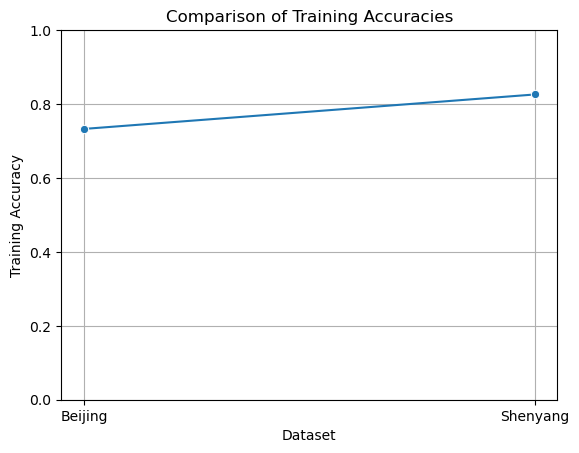

In [40]:
# Create a DataFrame for plotting
plot_data0 = pd.DataFrame({
    'Dataset': ["Beijing", "Shenyang"],
    'Training Accuracy': [train_accuracy_b, train_accuracy_h]
})

# Plotting
sns.lineplot(x = 'Dataset', y = 'Training Accuracy', data = plot_data0, marker = 'o')
plt.title('Comparison of Training Accuracies')
plt.ylim(0, 1) 
plt.grid(True)
plt.show()

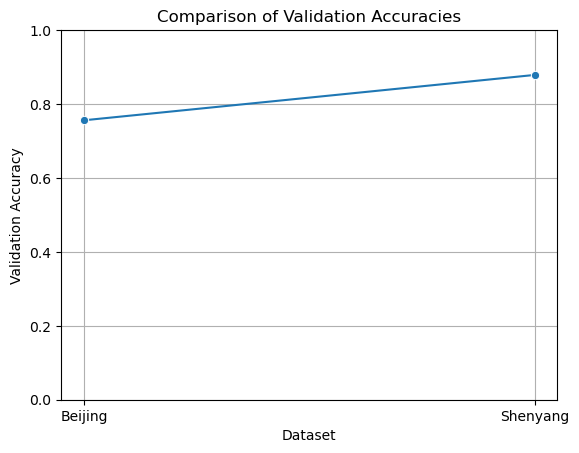

In [36]:
# Create a DataFrame for plotting
plot_data1 = pd.DataFrame({
    'Dataset': ["Beijing", "Shenyang"],
    'Validation Accuracy': [validation_accuracy_b, validation_accuracy_h]
})

# Plotting
sns.lineplot(x = 'Dataset', y = 'Validation Accuracy', data = plot_data1, marker = 'o')
plt.title('Comparison of Validation Accuracies')
plt.ylim(0, 1) 
plt.grid(True)
plt.show()

Next, we are goign to evaluate our models in Guangzhou and Shanghai cities, this two models have the same quantity of data, so, they should perform similarly or even better for the classifier_b.

In [19]:
#Guangzhou
test_accuracy_g1 = classifier_b.score(test_X_g, test_y_g)
print(f'Test Accuracy g1: {test_accuracy_g1}')

test_accuracy_g2 = classifier_h.score(test_X_g, test_y_g)
print(f'Test Accuracy g2: {test_accuracy_g2}')

#Shanghai
test_accuracy_s1 = classifier_b.score(test_X_s, test_y_s)
print(f'Test Accuracy s1: {test_accuracy_s1}')

test_accuracy_s2 = classifier_h.score(test_X_s, test_y_s)
print(f'Test Accuracy s2: {test_accuracy_s2}')

Test Accuracy g1: 0.6420664206642066
Test Accuracy g2: 0.9261992619926199
Test Accuracy s1: 0.6309963099630996
Test Accuracy s2: 0.8745387453874539


This results are even more weird, because our classifier_h have overfit it's data but it permorfs much better than our classifier_b that generalizes better. The only thing that I can think of is that this is due to the performance of K-Means that depends on the distribution and separability of clusters in the data. Another thing that can be happening is that the patterns in the test data differ significantly from the training data, and even if it overfit in classifier_h that doesn't mean that is goign to perform worst on another unseen datasets.

To improve our model, we can use the regulariztion technique that we have seen in class, this technique is used to prevent overfitting by adding a penalty to the loss function that increases with the complexity of the model. Also, we can use the cross-valiation tecnique instead of a regular validation, this one consists of splitting the training data into several subsets and training the model multiple times, each time using a different subset as the validation set. This can provide a more robust estimate of the model's performance. Finally, another approach that we can use if we have enough money is to increase the size of our data to improve our model or check how it impacts on the model itself.


*Now, we are going to do a little experiment to understand our data better.

We are going to train a model for the rest of the cities and see if they perform better than the models before with their own model and not using the other cities model.

In [27]:
classifier_g = KMeansClassifier(n_clusters)
training_accuracy_g = classifier_g.fit(train_X_g, train_y_g)

classifier_s = KMeansClassifier(n_clusters)
training_accuracy_s = classifier_s.fit(train_X_s, train_y_s)

train_accuracy_g = classifier_g.score(train_X_g, train_y_g)
print(f'Training Accuracy g: {train_accuracy_g}')

train_accuracy_s= classifier_s.score(train_X_s, train_y_s)
print(f'Training Accuracy h: {train_accuracy_s}')

# Validate classifier
validation_accuracy_g = classifier_g.score(val_X_g, val_y_g)
print(f'Validation Accuracy: {validation_accuracy_g}')

validation_accuracy_s = classifier_s.score(val_X_s, val_y_s)
print(f'Validation Accuracy: {validation_accuracy_s}')

C:\Users\Fran\anaconda3\envs\dml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Fran\anaconda3\envs\dml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training Accuracy g: 0.9395061728395062
Training Accuracy h: 0.9
Validation Accuracy: 0.9298892988929889
Validation Accuracy: 0.8888888888888888


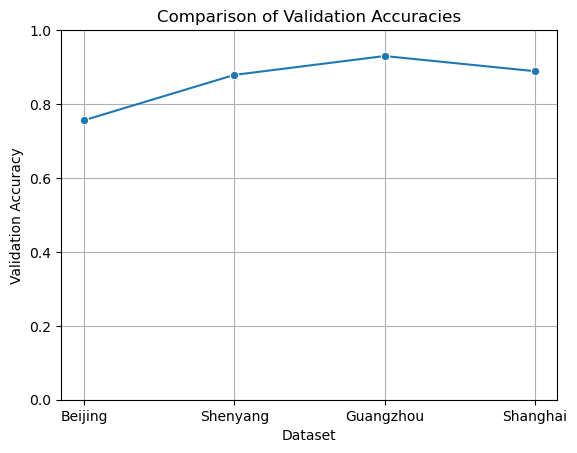

In [35]:
# Create a DataFrame for plotting
plot_data1 = pd.DataFrame({
    'Dataset': ["Beijing", "Shenyang", "Guangzhou", "Shanghai"],
    'Validation Accuracy': [validation_accuracy_b, validation_accuracy_h ,validation_accuracy_g, validation_accuracy_s]
})

# Plotting
sns.lineplot(x = 'Dataset', y = 'Validation Accuracy', data = plot_data1, marker = 'o')
plt.title('Comparison of Validation Accuracies')
plt.ylim(0, 1) 
plt.grid(True)
plt.show()

In this case, our training accuracy is higher than the validation accuracy and that is because our model has overfit, we can solve adding regularization, or maybe adding more data or using another validation technique like cross-validation.

We can see as well that the models for this two cities performs generally better than the other two and that can be due to their major quality in data or a more accurate shape of data for this problem.

In [28]:
test_accuracy_g = classifier_g.score(test_X_g, test_y_g)
print(f'Test Accuracy: {test_accuracy_g}')

test_accuracy_s = classifier_s.score(test_X_s, test_y_s)
print(f'Test Accuracy: {test_accuracy_s}')

Test Accuracy: 0.933579335793358
Test Accuracy: 0.9188191881918819


We can try to check if the problem from the first example is due to having low quantity of data at traning, so we are going to put this datasets together to see if this was the problem.

In [41]:
df_p = pd.concat([df1,df2], ignore_index = True)

# Preprocess data
X_p = df_p.drop('PM_HIGH', axis=1)
y_p = df_p['PM_HIGH']

print(X_p.shape)
print(y_p.shape)


# Split data into training/validation and test sets
train_val_X_p, test_X_p, train_val_y_p, test_y_p = train_test_split(X_p, y_p, test_size = 0.2, random_state = 42)

# Further split training/validation data
train_X_p, val_X_p, train_y_p, val_y_p = train_test_split(train_val_X_p, train_val_y_p, test_size = 0.25, random_state = 42)


(2895, 10)
(2895,)


In [42]:
# Train classifier
classifier_p = KMeansClassifier(n_clusters)
classifier_p.fit(train_X_p, train_y_p)

train_accuracy_p = classifier_p.score(train_X_p, train_y_p)
print(f'Training Accuracy p: {train_accuracy_p}')
# Validate classifier
validation_accuracy_p = classifier_p.score(val_X_p, val_y_p)
print(f'Validation Accuracy p: {validation_accuracy_p}')

C:\Users\Fran\anaconda3\envs\dml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training Accuracy c: 0.7501439263097294
Validation Accuracy c: 0.7616580310880829


In [43]:
# Test classifier
test_accuracy_p = classifier_p.score(test_X_p, test_y_p)
print(f'Test Accuracy p: {test_accuracy_p}')

Test Accuracy p: 0.7271157167530224


With that results we can confirm that the problem of the Beijing model is not having a low quantity of data.

Another test that can be done is that this two last cities were both similar, so we can concatenate their datasets to get more data and try to aim to a higher accuracy.

In [30]:
df_c = pd.concat([df3,df4], ignore_index = True)

# Preprocess data
X_c = df_c.drop('PM_HIGH', axis=1)
y_c = df_c['PM_HIGH']

print(X_c.shape)
print(y_c.shape)


# Split data into training/validation and test sets
train_val_X_c, test_X_c, train_val_y_c, test_y_c = train_test_split(X_c, y_c, test_size = 0.2, random_state = 42)

# Further split training/validation data
train_X_c, val_X_c, train_y_c, val_y_c = train_test_split(train_val_X_c, train_val_y_c, test_size = 0.25, random_state = 42)


(2703, 10)
(2703,)


In [32]:
# Train classifier
classifier_c = KMeansClassifier(n_clusters)
classifier_c.fit(train_X_c, train_y_c)

train_accuracy_c = classifier_c.score(train_X_c, train_y_c)
print(f'Training Accuracy c: {train_accuracy_c}')
# Validate classifier
validation_accuracy_c = classifier_c.score(val_X_c, val_y_c)
print(f'Validation Accuracy c: {validation_accuracy_c}')

C:\Users\Fran\anaconda3\envs\dml\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training Accuracy c: 0.9099321406539174
Validation Accuracy c: 0.9371534195933456


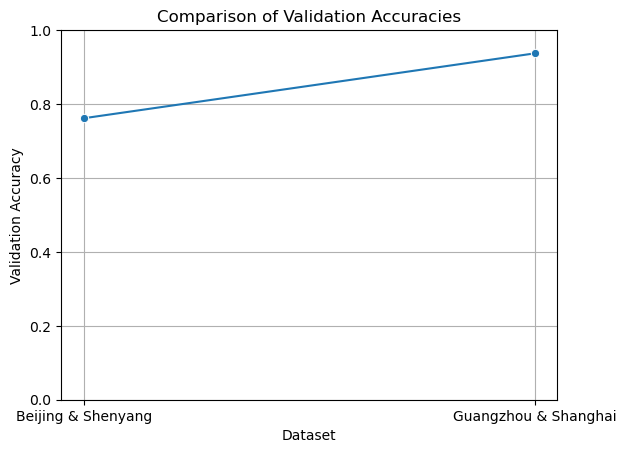

In [45]:
# Create a DataFrame for plotting
plot_data1 = pd.DataFrame({
    'Dataset': ["Beijing & Shenyang", "Guangzhou & Shanghai"],
    'Validation Accuracy': [validation_accuracy_p, validation_accuracy_c]
})

# Plotting
sns.lineplot(x = 'Dataset', y = 'Validation Accuracy', data = plot_data1, marker = 'o')
plt.title('Comparison of Validation Accuracies')
plt.ylim(0, 1) 
plt.grid(True)
plt.show()

In [46]:
# Test classifier
test_accuracy_c = classifier_c.score(test_X_c, test_y_c)
print(f'Test Accuracy c: {test_accuracy_c}')

Test Accuracy c: 0.9279112754158965


As we can see, we get the same situation as in the first example that we have seen above.
